In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head(10)

,"formance as the whimpering alcoholic. What a stunning movie! This film proves what I've been thinking for ages - Sirk is the master of classic melodrama. Where's his Oscar?<br /><br />""",positive
0,The Italian Job is a real blast to watch. It's...,positive
1,"Of those comments here before mine, I mostly a...",positive
2,"I'm a pretty old dude, old enough to remember ...",positive
3,the only reason i bought this DVD is because c...,negative
4,Where do they get the money to make films like...,negative
5,eXistenZ combines director David Cronenberg's ...,positive
6,I don't think I really have any spoilers in he...,positive
7,not to long after Jeff Jarrett left the WWF fo...,negative
8,This is an excellent film. The aerial scenes w...,positive
9,"""2001: A Space Odyssey"" is set in 2001 and the...",positive


In [133]:
df.columns

Index(['formance as the whimpering alcoholic. What a stunning movie! This film proves what I've been thinking for ages - Sirk is the master of classic melodrama. Where's his Oscar?<br /><br />"', 'positive'], dtype='object')

In [134]:
df.info()
#Unclear column name (looks like a part of the review has been set as 1st column's name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39726 entries, 0 to 39725
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                                                     --------------  ----- 
 0   formance as the whimpering alcoholic. What a stunning movie! This film proves what I've been thinking for ages - Sirk is the master of classic melodrama. Where's his Oscar?<br /><br />"  39726 non-null  object
 1   positive                                                                                                                                                                                   39726 non-null  object
dtypes: object(2)
memory usage: 

In [135]:
df.rename(columns={df.columns[0]:"review" }, inplace=True)
df.rename(columns={df.columns[1]:"sentiment"}, inplace=True)
df.info()
#columns names have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39726 entries, 0 to 39725
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     39726 non-null  object
 1   sentiment  39726 non-null  object
dtypes: object(2)
memory usage: 620.8+ KB


In [136]:
df['review']=df['review'].str.lower()
df['review']=df['review'].str.replace(r'<.*?>', '', regex=True)
df['review'] = df['review'].str.replace(r'[^a-z0-9\s]', ' ', regex=True)
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True).str.strip()

df['review']

,review
0,the italian job is a real blast to watch it s ...
1,of those comments here before mine i mostly ag...
2,i m a pretty old dude old enough to remember t...
3,the only reason i bought this dvd is because c...
4,where do they get the money to make films like...
...,...
39721,i thought this movie did a down right good job...
39722,bad plot bad dialogue bad acting idiotic direc...
39723,i am a catholic taught in parochial elementary...
39724,i m going to have to disagree with the previou...


In [137]:
df.replace('', np.nan, inplace=True)
df.dropna(subset=['review'], inplace=True)
df
#no null values

,review,sentiment
0,the italian job is a real blast to watch it s ...,positive
1,of those comments here before mine i mostly ag...,positive
2,i m a pretty old dude old enough to remember t...,positive
3,the only reason i bought this dvd is because c...,negative
4,where do they get the money to make films like...,negative
...,...,...
39721,i thought this movie did a down right good job...,positive
39722,bad plot bad dialogue bad acting idiotic direc...,negative
39723,i am a catholic taught in parochial elementary...,negative
39724,i m going to have to disagree with the previou...,negative


In [138]:
df.drop_duplicates(subset=['review', 'sentiment'], inplace=True)
df
#about 286 duplicates found and deleted

,review,sentiment
0,the italian job is a real blast to watch it s ...,positive
1,of those comments here before mine i mostly ag...,positive
2,i m a pretty old dude old enough to remember t...,positive
3,the only reason i bought this dvd is because c...,negative
4,where do they get the money to make films like...,negative
...,...,...
39721,i thought this movie did a down right good job...,positive
39722,bad plot bad dialogue bad acting idiotic direc...,negative
39723,i am a catholic taught in parochial elementary...,negative
39724,i m going to have to disagree with the previou...,negative


In [139]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, stratify=df['sentiment'], random_state=42)

In [140]:
train_df

,review,sentiment
16199,i don t know but the movie was just too simila...,negative
27018,when i saw that this film was only 80 minutes ...,positive
29451,it reaches the minds and feelings of everyone ...,positive
23363,contrary to most reviews i ve read i didn t fe...,positive
1907,i enjoyed the feel of the opening few minutes ...,negative
...,...,...
2088,only the chosen ones will appreciate the quali...,positive
8902,i truly enjoyed the movie however i did not re...,positive
20077,i usually enjoy watching laurel and hardy but ...,negative
37372,this is unlike any other movie the closest thi...,positive


In [141]:
test_df

,review,sentiment
1549,some fraud girl tries to compete in the big le...,negative
10144,i don t know what it is about donald sutherlan...,negative
30524,this is not a new film it is a re cut of 1994 ...,negative
6534,even with all the cinema dealing with the trau...,positive
3942,anthony quinn was a legend of 20th century in ...,positive
...,...,...
14130,the russian space station avna with a crew of ...,negative
35787,i viewed the movie together with a homophobic ...,positive
19443,margret laurence probably didn t intend on hav...,negative
33268,the worst movie ever hardly this is one of the...,positive


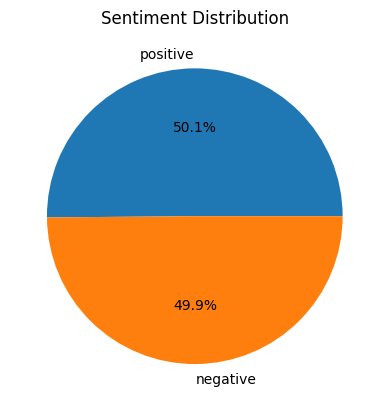

In [142]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%', title='Sentiment Distribution')
plt.ylabel('')
plt.show()

In [143]:
df['review_length'] = df['review'].str.split().apply(len)
display(df['review_length'].max())
display(df['review_length'].min())
display(df['review_length'].mean())

2498

6

np.float64(235.6173681541582)

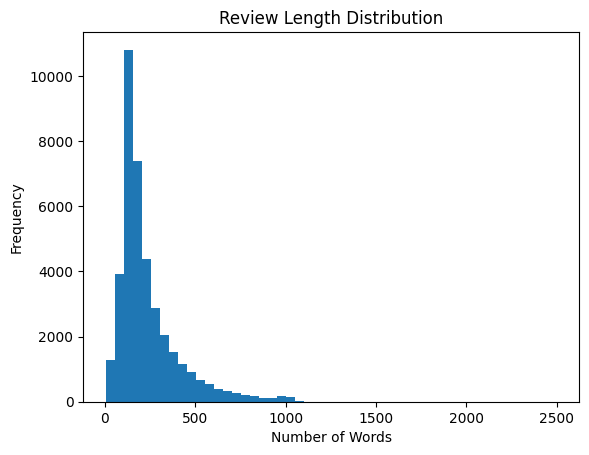

In [144]:
df['review_length'].plot(kind='hist', bins=50, title='Review Length Distribution')
plt.xlabel('Number of Words')
plt.show()
#skewed to the left

In [145]:
all_words = " ".join(df['review']).split()
unique, counts = np.unique(all_words, return_counts=True)
freq_df = pd.DataFrame({'word': unique, 'count': counts})
freq_df = freq_df.sort_values(by='count', ascending=False)
print(freq_df.head(10))

       word   count
82991   the  526515
4162    and  255943
1413      a  254889
58588    of  228428
84076    to  211766
43080    is  166246
43224    it  150582
41190    in  147395
40391     i  138910
83345  this  119024


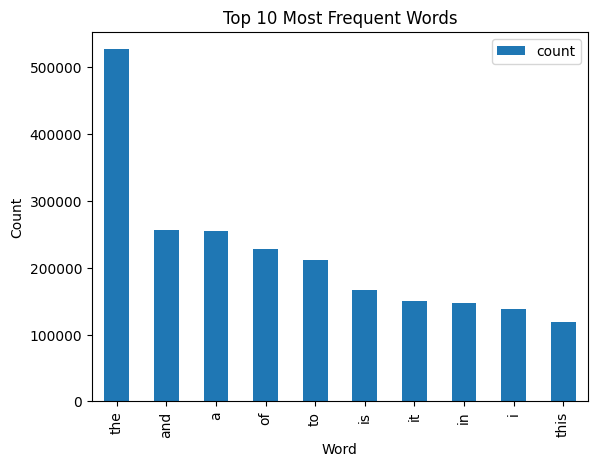

In [146]:
freq_df.head(10).plot(kind='bar', x='word', y='count', title='Top 10 Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()